# Scottish Haggis Data Analysis
**Author:** Pedro Fernandes

## 1. Introduction

### Description of the Dataset

This dataset contains 344 recorded sightings of the Scottish haggis which is a rare wildlife species recently discovered across three Scottish islands: Iona, Skye, and Shetland. This monitoring effort was commissioned by Lord Ramsay McCraig, a renowned Scottish wildlife pioneer, and has documented three distinct species: the **Macduff**, the **Wild Rambler**, and the **Bog Sniffler**.

Each observation includes:

- **Morphological measurements**: nose length (mm), eye size (mm), tail length (mm), and body mass (g)
- **Demographic data**: sex of the specimen
- **Temporal and geographical context**: island location and year of sighting (2023–2025)

The dataset represents a unique opportunity to understand the physical characteristics and distributions of these newly monitored species across different island ecosystems.

---

## Step 1: Understanding the Dataset
Before analysing, we need to understand:
- how many rows there are
- how many columns
- what type of data each column contains
- whether there are missing values


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set visual style
sns.set(style="whitegrid")

# Load data
df = pd.read_csv('scottish_haggis_2025.csv')

print("Dataset loaded successfully!")

# Inspect first 5 rows
print("First 5 rows:")
display(df.head())

Dataset loaded successfully!
First 5 rows:


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


In [8]:
# Check data types and missing values
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB
None


In [18]:
# Summary statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [10]:
#Check for unique values in categorical columns to identify typos
print("\nUnique Species:", df['species'].unique())
print("Unique Sex:", df['sex'].unique())
print("Unique Islands:", df['island'].unique())


Unique Species: ['Macduff' 'WildRambler' 'BogSniffler']
Unique Sex: ['female' 'male' nan 'green']
Unique Islands: ['Skye' 'Iona' 'Shetland']


## Stage 1: Data Cleaning & Exploratory Data Analysis (EDA)

### Data Cleaning:
During inspection, we identified the following issues:
1.  **Missing Values**: There are a few rows missing physical measurements (`nose_length_mm`, etc.) and some missing `sex`.
2.  **Data Errors**: One record has 'green' listed as the sex, which is clearly a data entry error.

**Justification**:
* We will drop the row with 'green' sex as it is invalid.
* We will drop rows with missing measurements and missing sex. Since these represent a very small percentage of the dataset (<5%), removing them is safer than imputing (guessing) values, which could introduce bias.

In [ ]:
# 1. Drop rows where measurements are missing
df_clean = df.dropna(subset=['nose_length_mm', 'body_mass_g'])

# 2. Fix the 'green' sex error (remove that row)
df_clean = df_clean[df_clean['sex'] != 'green']

# 3. Drop rows where sex is missing (NaN)
df_clean = df_clean.dropna(subset=['sex'])

print(len(df))
print(len(df_clean))
print
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

# Verify clean
print("\nRemaining missing values:")
print(df_clean.isnull().sum())

Original dataset shape: (344, 9)
Cleaned dataset shape: (333, 9)

Remaining missing values:
id                0
species           0
island            0
nose_length_mm    0
eye_size_mm       0
tail_length_mm    0
body_mass_g       0
sex               0
year              0
dtype: int64


## Exploratory Data Analysis (EDA)
Now that the data is clean, we explore distributions, relationships, and patterns through visualization. This section guides our modeling decisions in later stages.

### Categorical Feature Distributions
We inspect the balance of our categorical variables. Imbalanced classes (e.g., if one species had very few records) could bias our classification models.

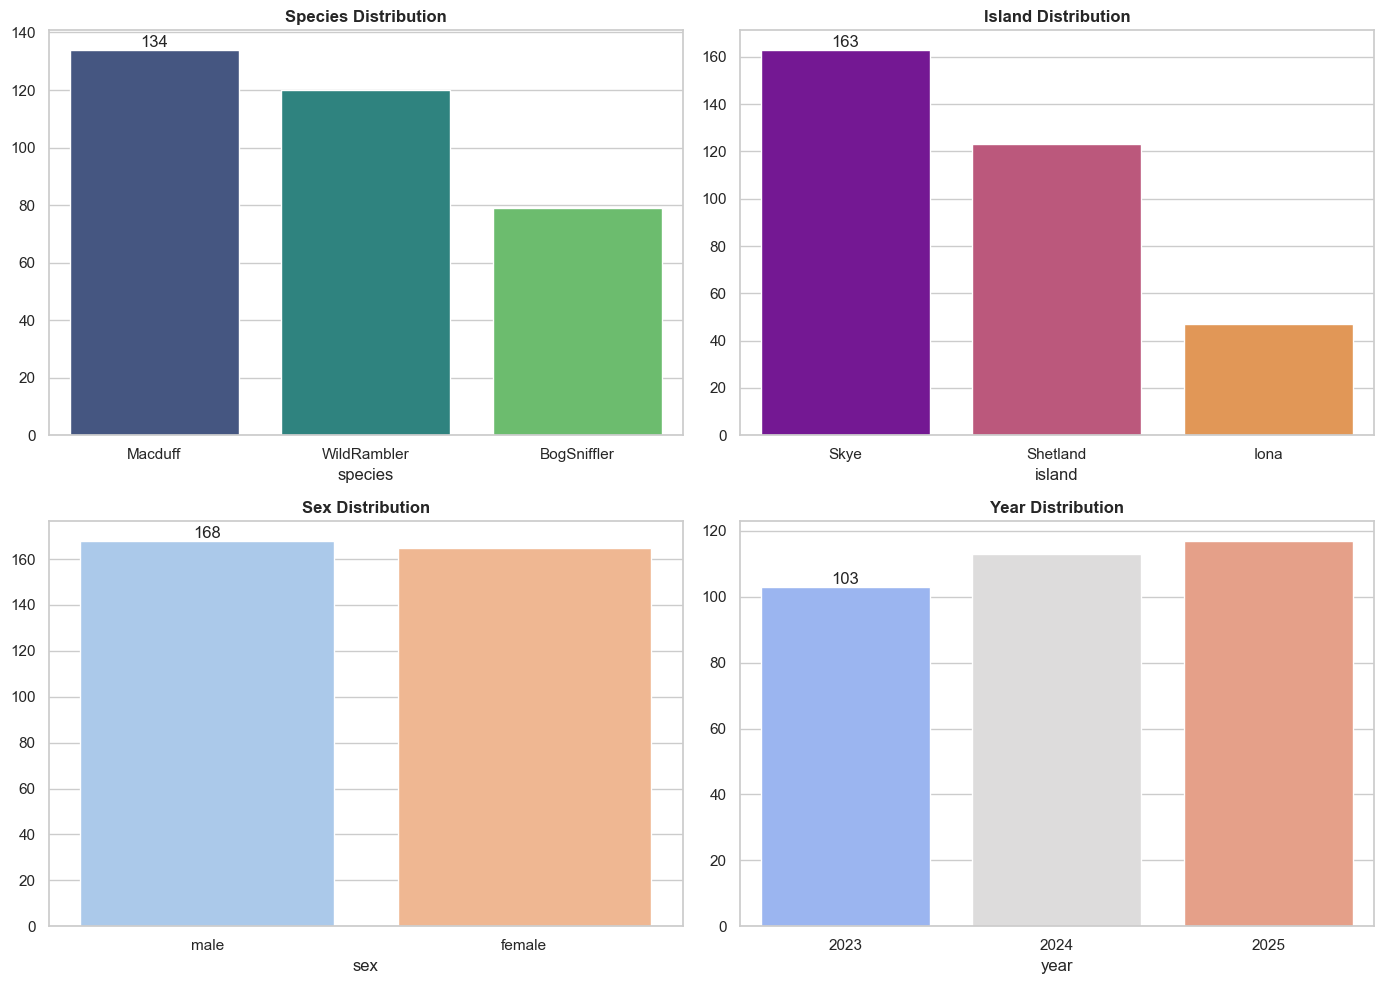

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for 4 categorical plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Species Distribution
species_counts = df_clean['species'].value_counts()
sns.barplot(x=species_counts.index, y=species_counts.values, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Species Distribution', fontweight='bold')
axes[0, 0].bar_label(axes[0, 0].containers[0])

# 2. Island Distribution
island_counts = df_clean['island'].value_counts()
sns.barplot(x=island_counts.index, y=island_counts.values, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Island Distribution', fontweight='bold')
axes[0, 1].bar_label(axes[0, 1].containers[0])

# 3. Sex Distribution
sex_counts = df_clean['sex'].value_counts()
sns.barplot(x=sex_counts.index, y=sex_counts.values, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Sex Distribution', fontweight='bold')
axes[1, 0].bar_label(axes[1, 0].containers[0])

# 4. Year Distribution
year_counts = df_clean['year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('Year Distribution', fontweight='bold')
axes[1, 1].bar_label(axes[1, 1].containers[0])

plt.tight_layout()
plt.show()

**Observations:**

* **Species:** The dataset is fairly balanced, though 'Macduff' is the most common (approx 40%) and 'Bog Sniffler' the least (approx 23%). This slight imbalance is acceptable for standard classification algorithms.
* **Island:** 'Skye' is the dominant location. We must ensure our models don't just learn "Skye = Macduff" without considering physical features.
* **Sex:** Near-perfect balance between Male and Female.

### Numerical Feature Distributions & Outliers
We analyze the spread of physical measurements to detect biological groupings or errors. We will use the **Z-Score method** (threshold > 3) to formally check for statistical outliers.

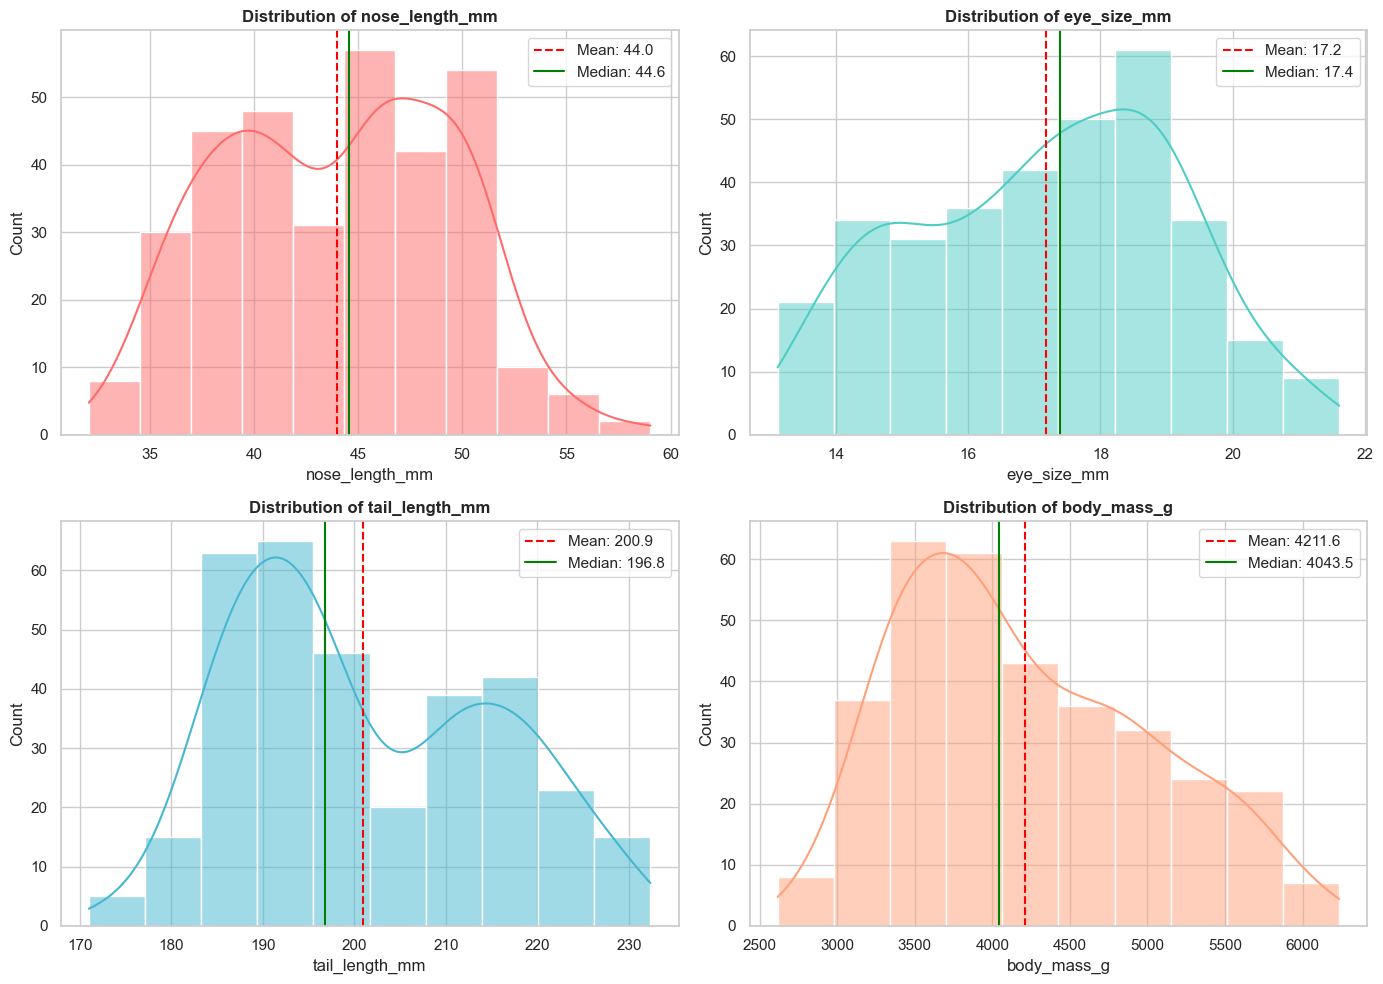

Total outliers detected (|z| > 3): 0
No statistical outliers detected. All data points are within 3 standard deviations.


In [22]:
from scipy import stats

# Define numeric features (excluding ID and Year as they aren't physical traits)
numeric_features = ['nose_length_mm', 'eye_size_mm', 'tail_length_mm', 'body_mass_g']

# 1. Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, feature in enumerate(numeric_features):
    ax = axes[idx//2, idx%2]
    sns.histplot(df_clean[feature], kde=True, ax=ax, color=colors[idx])
    
    # Add mean and median lines
    mean_val = df_clean[feature].mean()
    median_val = df_clean[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f}')
    ax.set_title(f'Distribution of {feature}', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

# 2. Formal Outlier Check (Z-Score)
z_scores = np.abs(stats.zscore(df_clean[numeric_features]))
outliers_mask = (z_scores > 3).any(axis=1)
outliers = df_clean[outliers_mask]

print(f"Total outliers detected (|z| > 3): {len(outliers)}")
if len(outliers) > 0:
    display(outliers)
else:
    print("No statistical outliers detected. All data points are within 3 standard deviations.")

**Biological Insight:**
* **Bimodality:** `nose_length_mm` and `body_mass_g` show "two humps" (bimodal distribution). This strongly suggests there are at least two distinct physical groups of Haggis—likely a "Small/Short-Nose" group and a "Large/Long-Nose" group.
* **Outliers:** No statistical outliers were detected. This means even the largest or smallest animals in our dataset are within a natural biological range, so we do not need to drop any more data.

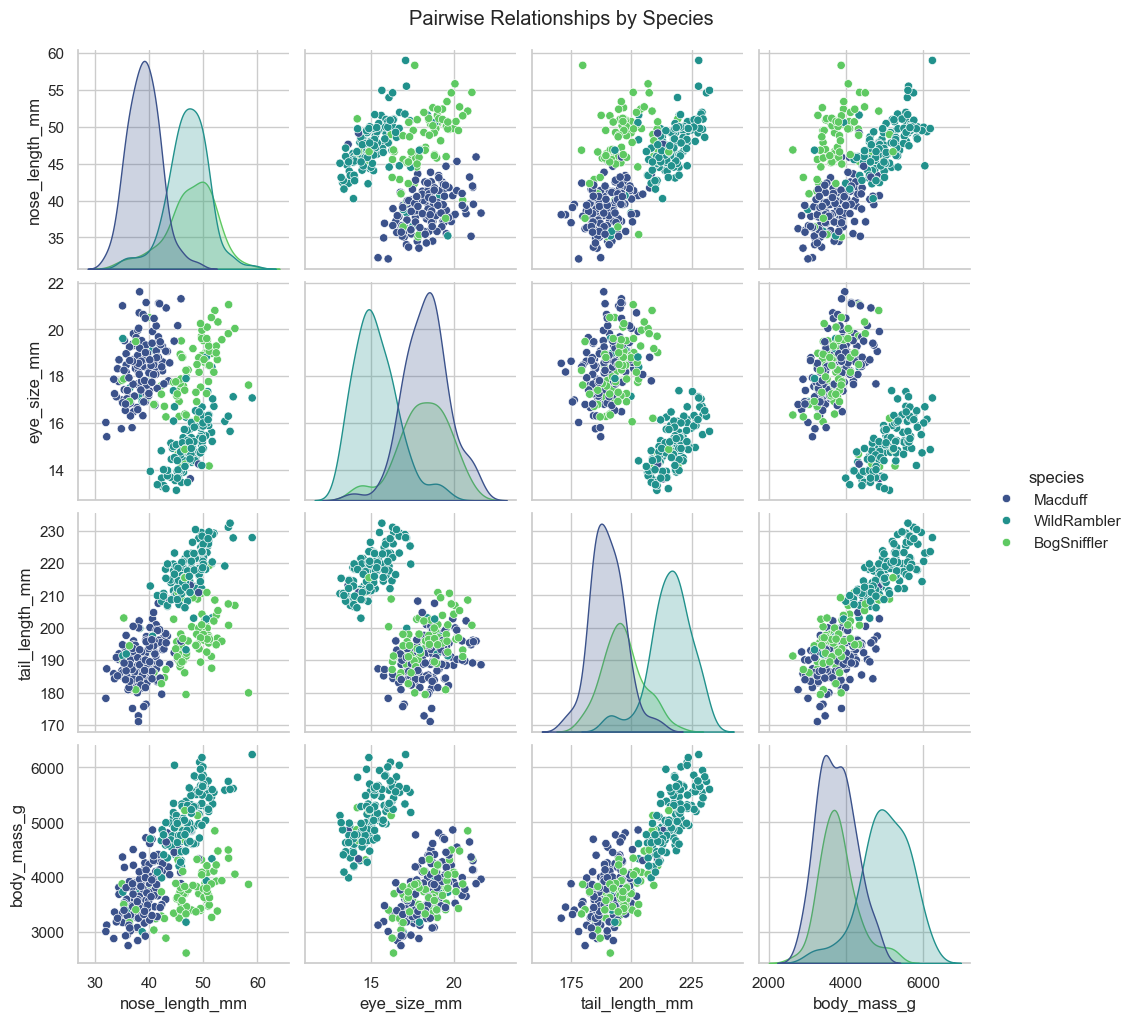

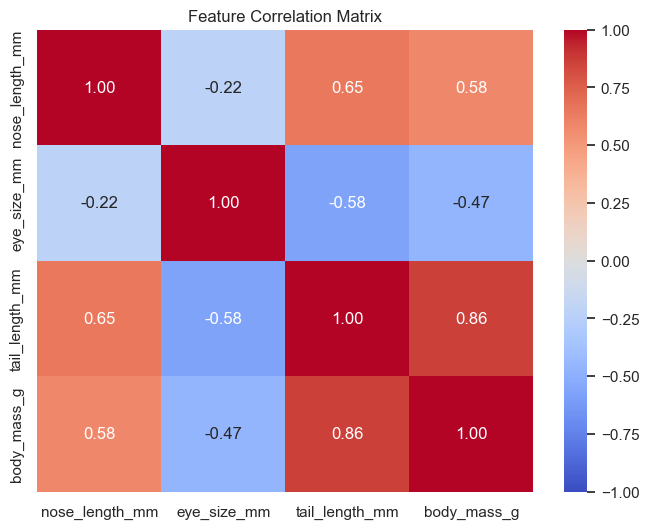

In [23]:
# 1. Pairplot
# We color by species to see if physical traits separate the groups naturally
sns.pairplot(df_clean, hue='species', vars=numeric_features, palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Species', y=1.02)
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(8, 6))
# Calculate correlation only on numeric physical features
corr_matrix = df_clean[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

**Critical Analysis & Modelling Implications:**

1.  **High Multicollinearity (Tail vs Mass):**
    * There is a very strong positive correlation (**0.86**) between `body_mass_g` and `tail_length_mm`.
    * *Biological Insight:* Heavier haggis have significantly longer tails.
    * *Modelling Implication:* These two features carry redundant information. For Linear Regression, this might cause instability (multicollinearity). We might consider using only one of them or using regularization techniques later.

2.  **Negative Correlation (Eye Size):**
    * `eye_size_mm` has a negative correlation with body mass.
    * *Biological Insight:* The largest species ('Wild Rambler') actually has the smallest eyes, while the smaller 'Macduff' has larger eyes. This counter-intuitive finding makes `eye_size_mm` a powerful "splitting" feature for our Decision Trees.

3.  **Separability:**
    * The pairplot clearly shows that 'Wild Rambler' is distinct (large mass, long nose).
    * However, 'Macduff' and 'Bog Sniffler' have some overlap in Body Mass, but 'Bog Sniffler' has a distinctly longer nose.